In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# LOADING DATASET

dataset = pd.read_csv('./Dataset_Phishing.csv')

In [3]:
dataset.shape

(11055, 31)

In [4]:
dataset.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [5]:
# SELECTING THE FEATURES FOR OUR MODEL

featured_columns = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'HTTPS_token', 'Redirect', 'RightClick', 'Iframe']
label_class = ['Result']


X = dataset[featured_columns]
y = dataset[label_class]

print(X)
print(y)

       having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Doma

In [6]:
# DATA CLEANING PROCESS

X.isnull().any()

having_IP_Address           False
URL_Length                  False
Shortining_Service          False
having_At_Symbol            False
double_slash_redirecting    False
Prefix_Suffix               False
having_Sub_Domain           False
HTTPS_token                 False
Redirect                    False
RightClick                  False
Iframe                      False
dtype: bool

In [7]:
y.isnull().any()

Result    False
dtype: bool

In [8]:
# FINDING THE CORRELATION/DEPENDANCY IN THE ATTRIBUTES

X.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token,Redirect,RightClick,Iframe
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.363534,-0.321181,0.042881,0.054694
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,-0.089383,0.046832,-0.013613,-0.013838
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,0.757838,-0.534530,0.038118,0.016581
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.104561,-0.028160,0.219503,0.284410
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,0.760799,-0.591478,0.025863,0.010459
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,-0.070153,0.016271,-0.024868,-0.036904
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,-0.037239,0.031206,0.018230,0.010637
HTTPS_token,0.363534,-0.089383,0.757838,0.104561,0.760799,-0.070153,-0.037239,1.000000,-0.460165,0.009265,0.017509
Redirect,-0.321181,0.046832,-0.534530,-0.028160,-0.591478,0.016271,0.031206,-0.460165,1.000000,-0.023586,-0.012668
RightClick,0.042881,-0.013613,0.038118,0.219503,0.025863,-0.024868,0.018230,0.009265,-0.023586,1.000000,0.655863


In [9]:
# SPLITTING THE DATASET FOR TESTING AND TRAINING OF DATA

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 18)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7738, 11) (3317, 11) (7738, 1) (3317, 1)


In [10]:
# DECISION TREE CLASSIFIER

decision_tree_model = DecisionTreeClassifier(max_depth=5)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
print("Accuracy - Decision Tree Classifier:\n{0:.4f}".format(accuracy_score(y_test, y_pred)))
DTC_CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",DTC_CM)
print("Report:\n",classification_report(y_test, y_pred))

Accuracy - Decision Tree Classifier:
0.7365
Confusion Matrix:
 [[1137  309]
 [ 565 1306]]
Report:
               precision    recall  f1-score   support

          -1       0.67      0.79      0.72      1446
           1       0.81      0.70      0.75      1871

    accuracy                           0.74      3317
   macro avg       0.74      0.74      0.74      3317
weighted avg       0.75      0.74      0.74      3317



In [11]:
# LOGISTIC REGRESSION CLASSIFIER

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train.values.flatten())
y_pred = logistic_regression_model.predict(X_test)
print("Accuracy - Logistic Regression Classifier:\n{0:.4f}".format(accuracy_score(y_test, y_pred)))
LRC_CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", LRC_CM)
print("Report:\n", classification_report(y_test, y_pred))

Accuracy - Logistic Regression Classifier:
0.7082
Confusion Matrix:
 [[ 903  543]
 [ 425 1446]]
Report:
               precision    recall  f1-score   support

          -1       0.68      0.62      0.65      1446
           1       0.73      0.77      0.75      1871

    accuracy                           0.71      3317
   macro avg       0.70      0.70      0.70      3317
weighted avg       0.71      0.71      0.71      3317



In [12]:
# GUASSIAN_NAIVE_BAYES CLASSIFIER

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train.values.flatten())
y_pred = naive_bayes_model.predict(X_test)
print("Accuracy - Naive Bayes Classifier:\n{0:.4}".format(accuracy_score(y_test, y_pred)))
NBC_CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", NBC_CM)
print("Report:\n", classification_report(y_test, y_pred))

Accuracy - Naive Bayes Classifier:
0.5767
Confusion Matrix:
 [[1446    0]
 [1404  467]]
Report:
               precision    recall  f1-score   support

          -1       0.51      1.00      0.67      1446
           1       1.00      0.25      0.40      1871

    accuracy                           0.58      3317
   macro avg       0.75      0.62      0.54      3317
weighted avg       0.79      0.58      0.52      3317



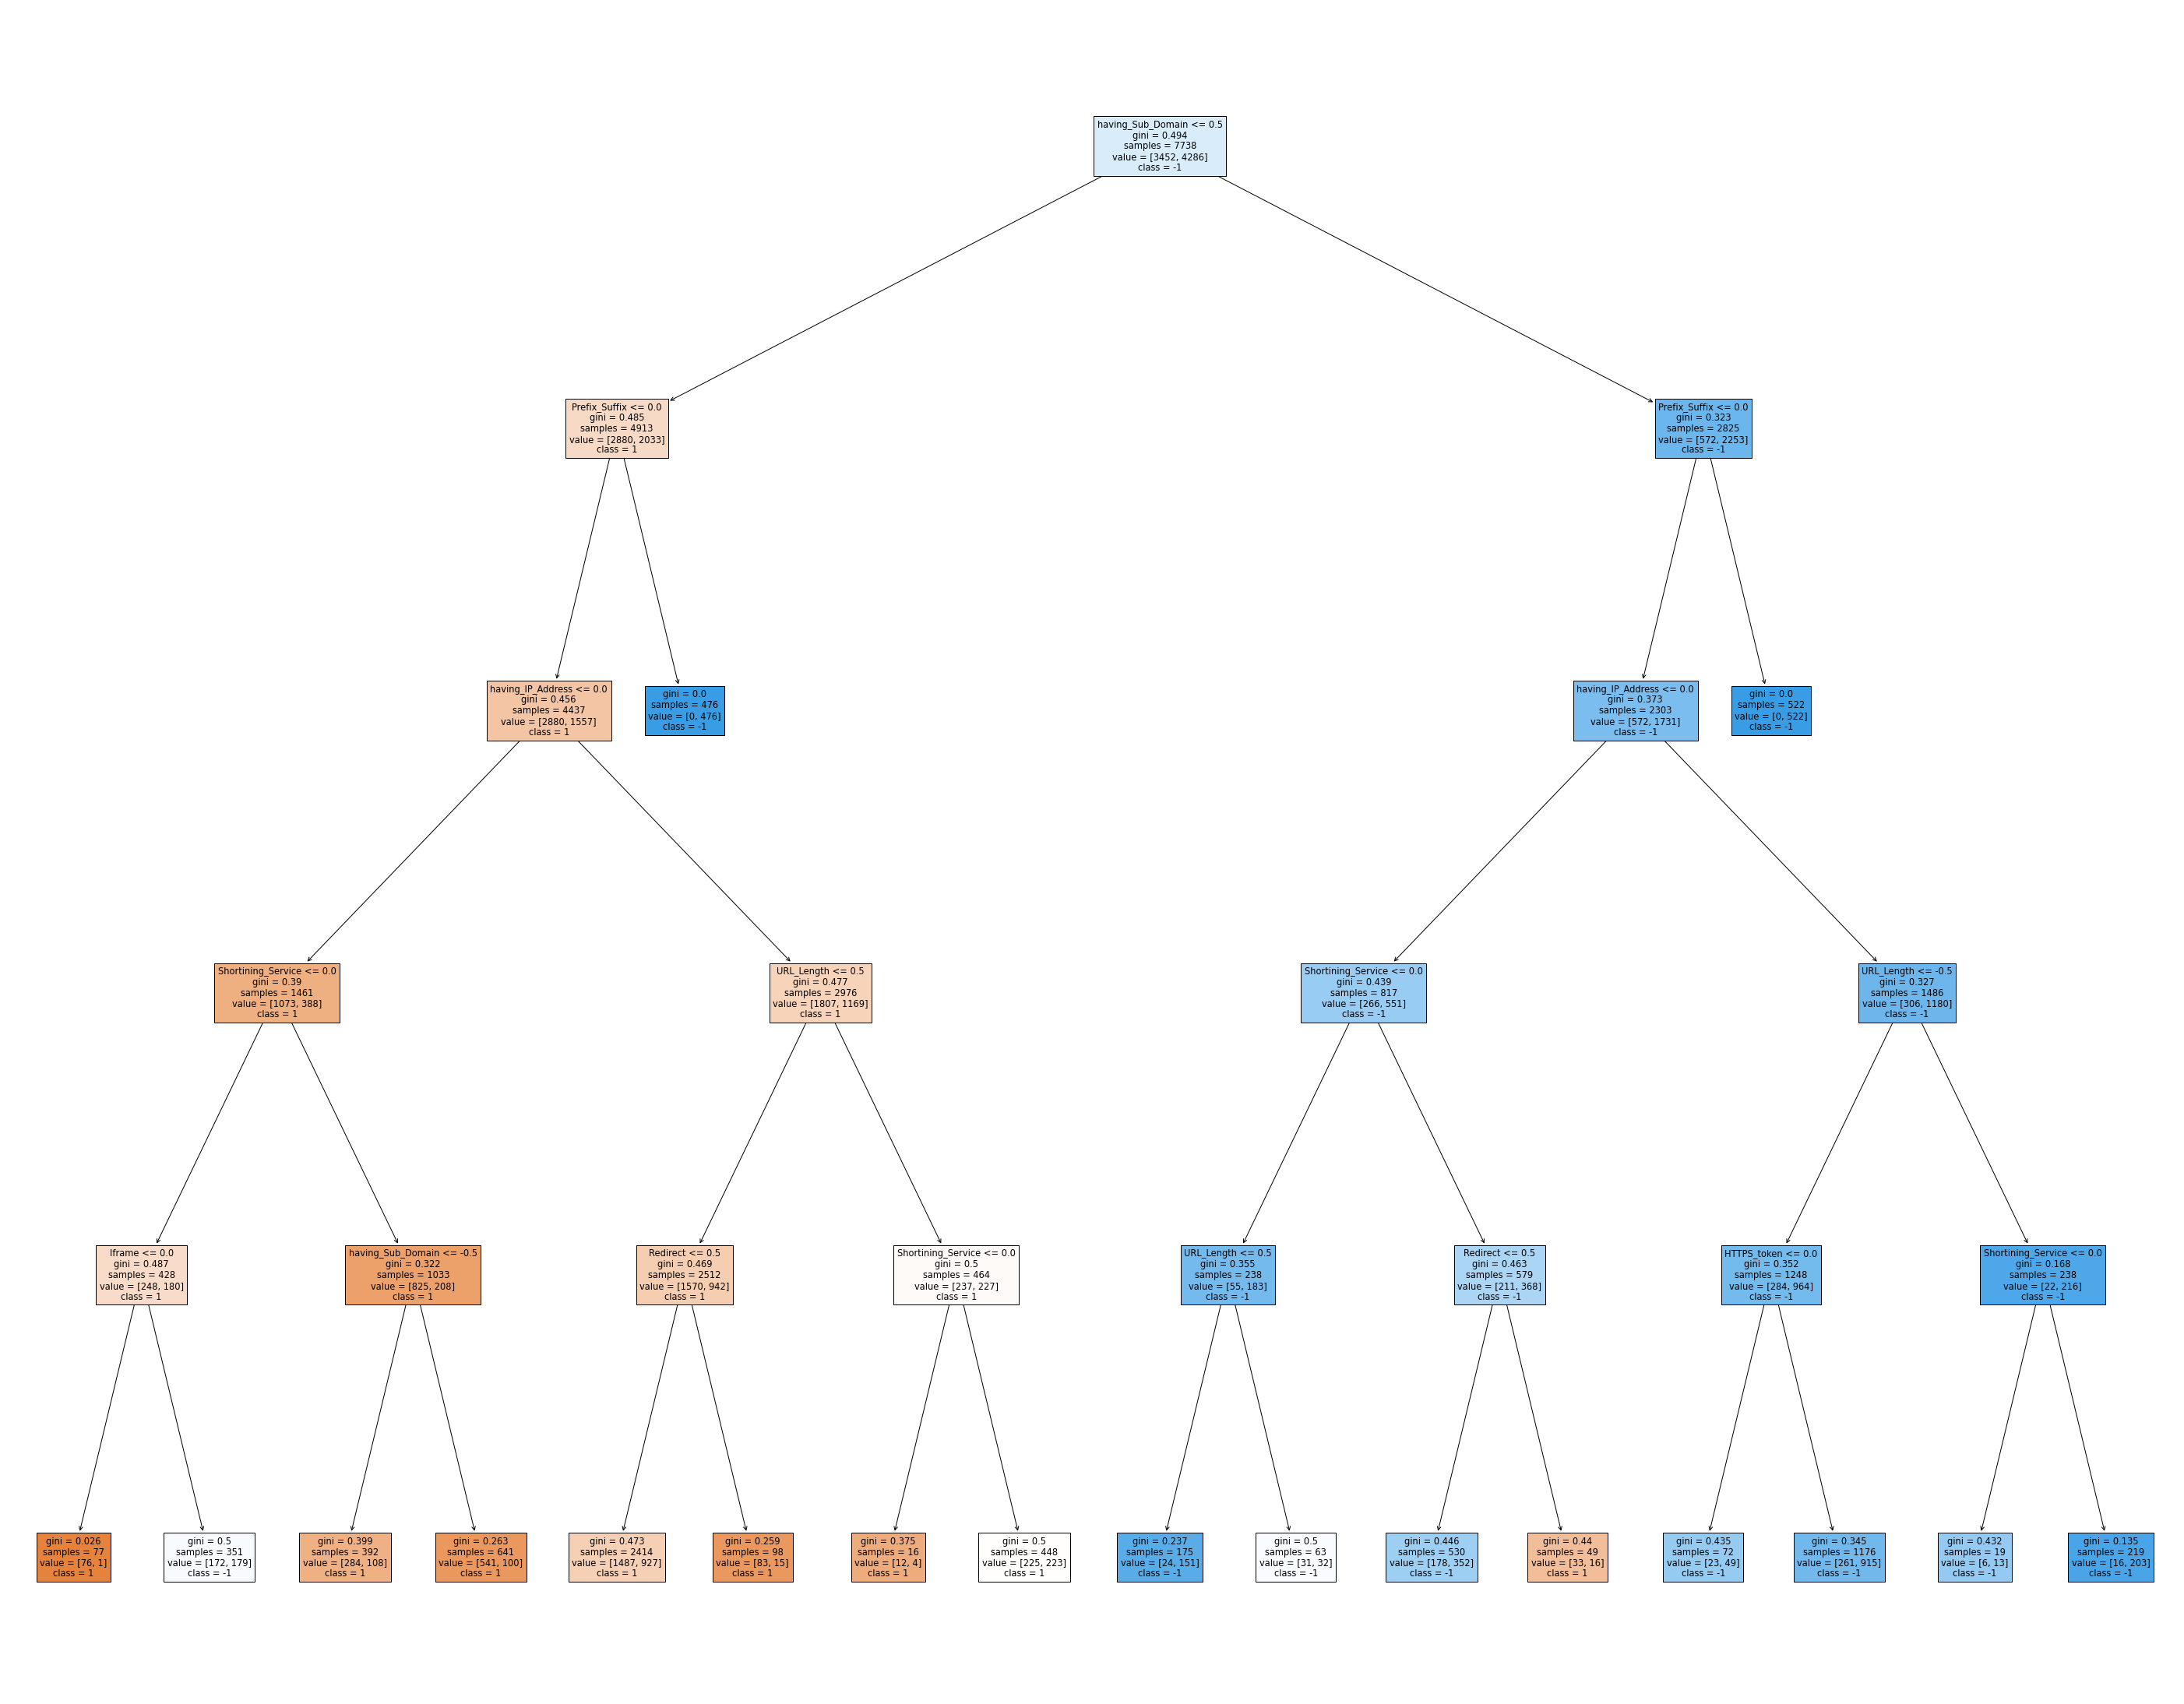

In [13]:
# VISUALISING TREE

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(decision_tree_model, feature_names=featured_columns, class_names=['1', '-1'], filled=True)

In [14]:
import joblib
joblib.dump(decision_tree_model, "decision_tree_model_saved.pkl")

['decision_tree_model_saved.pkl']